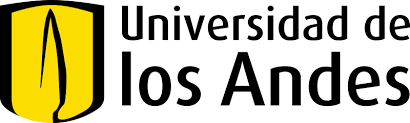

IIND-2104. Modelos Probabilisticos

<h1 style="color: #ADD8E6;">Complementaria 9: Simulación de Montecarlo</h1>


Una cadena de Markov es un proceso estocástico que experimenta transiciones de un estado a otro en un espacio de estados. Tiene la propiedad de que el estado futuro sólo depende del estado actual y no de la secuencia de acontecimientos que lo precedieron (propiedad de no memoria). La simulación Monte Carlo es un método que utiliza el muestreo aleatorio para aproximar la distribución de probabilidad de una cantidad desconocida. En el contexto de las cadenas de Markov, podemos utilizar simulaciones de Monte Carlo para estimar el comportamiento a largo plazo de la cadena.

En este tutorial se desarrollarán dos maneras diferentes de obtener medidas de interés de un sistema. La primera consiste en sacar valores esperados a partir de las probabilidades obtenidas de una Cadena de Markov, y la segunda consiste en realizar una simulación de Monte Carlo para generar diferentes escenarios que permitan estimar los valores esperados.

Una simulación de Monte Carlo es una técnica que permite calcular medidas de desempeño de un sistema que no es determinístico. Esto se hace mediante la creación de diferentes escenarios (o réplicas) a partir de un muestreo de los componentes aleatorios del sistema. Para realizar este muestreo, utilizamos las distribuciones de probabilidad de los componentes aleatorios. Una vez generados los diferentes escenarios se pueden, por ejemplo, utilizar los resultados de cada escenario para estimar la distribución de alguna medida de desempeño o promediar los resultados para estimar el valor esperado de una medida de desempeño.

La validez de los métodos de Monte Carlo se basa en la Ley de los Grandes Números y en el Teorema del Límite Central. La ley de los grandes números establece que, a medida que aumenta el número de muestras, la media muestral converge hacia la media real de la población. El teorema del límite central afirma que la distribución de la media muestral se aproxima a una distribución normal a medida que aumenta el tamaño de la muestra, independientemente de la distribución de la población. Estos teoremas garantizan que las estimaciones de Monte Carlo sean más precisas a medida que aumenta el número de muestras. Sin embargo, es importante tener en cuenta que la convergencia puede ser lenta para algunos problemas, requiriendo un gran número de muestras para alcanzar el nivel de precisión deseado.

Tomemos por ejemplo el siguiente proceso estocástico modelado como una CMTD:



$$
X_n = \text{Calidad del aire al finalizar el n-ésimo día}
$$

$$
S_X = \text{\{1 (Mala), 2 (Regular), 3 (Buena)\}}
$$

$$
\begin{bmatrix}
0.5 & 0.3 & 0.2 \\
0.3 & 0.4 & 0.3 \\
0.2 & 0.3 & 0.5
\end{bmatrix}
$$

Para crear la matriz en Python usamos el siguiente código:

In [12]:
import numpy as np
import pandas as pd

# Definir la matriz con probabilidades de transición a un paso (P)
estados = [1, 2, 3]

P = np.array([[0.5, 0.3, 0.2],
              [0.3, 0.4, 0.3],
              [0.2, 0.3, 0.5]])

# Crear un DataFrame para asignar nombres a las filas y columnas
P = pd.DataFrame(P, index=estados, columns=estados)

P


,1,2,3
1,0.5,0.3,0.2
2,0.3,0.4,0.3
3,0.2,0.3,0.5


Hasta este momento del curso, si se desea calcular el valor esperado de la calidad del aire o el valor esperado de algún costo asociado, se ha hecho uso de las probabilidades a un paso, varios pasos o en estado estable de la cadena de Markov. Sin embargo, también es posible realizar simulaciones de este proceso estocástico para estimar estas medidas. Asumamos que al final del día de hoy la calidad de aire es Mala (1). Siendo así, se sabe que las probabilidades de transición de la calidad del aire para el día siguiente son:

$$
P[X_{n+1}|X_{n}=1]= \begin{bmatrix}
0.5 & 0.3 & 0.2 \\
\end{bmatrix}
$$

Para hacer esto en Python, accedemos a la fila de la matriz $P$ que hace referencia al estado inicial (1).

In [20]:
# Estado actual
estado = 1
# Definir la distribución de probabilidad de la calidad de aire para el día siguiente, dado el estado actual
P.loc[estado,]

1    0.5
2    0.3
3    0.2
Name: 1, dtype: float64

Si deseamos simular la calidad del aire para el día de mañana, podemos generar una muestra aleatoria del estado futuro con estas probabilidades, de modo que, dado que actualmente estamos en el estado 1, con probabilidad de 0.5 se pase al estado 1, con probabilidad de 0.3 se pase al estado 2 y con probabilidad de 0.2 se pase al estado 3. Para esto, utilizamos la función `np,random.choice()`.

In [25]:
np.random.choice(estados, p=P[estado])

1

Esta función saca una muestra aleatoria del vector `estados` a partir de las probabilidades dadas por el parámetro `p`. Debido a que esta función realiza un muestreo aleatorio, siempre que se ejecute esta función obtendremos un resultado diferente.

Habiendo entendido cómo podemos muestrear el estado futuro a partir de las probabilidades de transición, ahora realizaremos varios muestreos para simular varios días de evolución de la calidad del aire. Debido a que la evolución depende de los muestreos aleatorios, utilizaremos una semilla para que la generación de números aleatorios sea igual cada vez que se ejecuta el código y los resultados sean reproducibles.

In [34]:
# Días de evolución
dias = 10

# Fijar la semilla para números aleatorios
np.random.seed(0)

# Definir el estado inicial
estado = 1

# Inicializar lista que contiene la calidad del aire en cada día
lista_estados = []

# Simular 10 días de evolución de la calidad del aire
for i in range(1, dias+1):
    # Guardar estado actual en la lista de estados
    lista_estados.append(estado)
    
    # Obtener estado futuro
    estado = np.random.choice(estados, p=P[estado])




Podemos utilizar los diferentes estados por los que pasó la cadena (almacenados en `lista_estados`) para graficar la evolución de la calidad del aire durante los 10 días.

Text(0, 0.5, 'Calidad del aire')

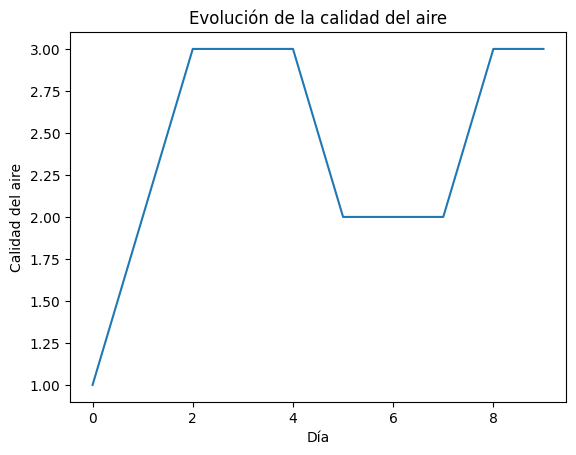

In [35]:
import matplotlib.pyplot as plt

plt.plot(lista_estados)
plt.title("Evolución de la calidad del aire")
plt.xlabel("Día")
plt.ylabel("Calidad del aire")

En la gráfica de arriba podemos observar un posible escenario de la evolución de la calidad del aire. Sin embargo, si nos interesa calcular medidas sobre este sistema, necesitaremos de una muestra más grande. Ahora haremos la simulación con 8 escenarios, u 8 evoluciones diferentes de la CMTD. Los resultados de cada escenario los iremos guardando en una matriz para graficarlos más adelante.

In [40]:
# Días de evolución
dias = 10

# Cantidad de escenarios
escenarios = 8

# Fijar semilla para números aleatorios
np.random.seed(0)

# Inicializar matriz para almacenar la simulación de la calidad del aire para cada escenario
matriz_calidad = np.zeros((dias, escenarios), dtype=float)

for j in range(1, escenarios+1):
    # Definir el estado inicial
    estado = 1
    
    # Simular 10 días de evolución de la calidad del aire
    for i in range(1, dias+1):
        # Guardar estado actual en la lista de estados
        matriz_calidad[i-1, j-1] = estado
        
        # Obtener estado futuro
        estado = np.random.choice(estados, p=P[estado])



Ahora, graficaremos la evolución de la calidad del aire para cada escenario.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


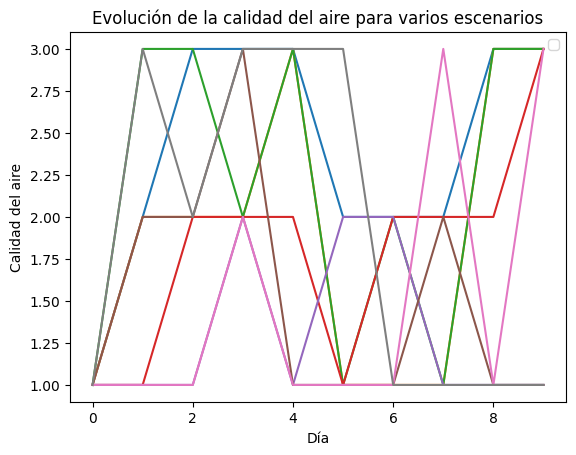

In [44]:
# Graficar cada serie (columna de la matriz)
for i in range(matriz_calidad.shape[1]):  # Iterar sobre las columnas
    plt.plot(matriz_calidad[:, i])  # Graficar la i-ésima columna

# Agregar títulos y etiquetas
plt.title("Evolución de la calidad del aire para varios escenarios")
plt.xlabel("Día")
plt.ylabel("Calidad del aire")

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Con esto en mente, ahora se resolverá el problema del archivo “Complementaria 11 (Q).pdf” que se encuentra en Bloque Neón.

Universidad de los Andes | Vigilada Mineducación. Reconocimiento como Universidad: Decreto 1297 del 30 de mayo de 1964. Reconocimiento personería jurídica: Resolución 28 del 23 de febrero de 1949 Minjusticia. Departamento de Ingeniería Industrial Carrera 1 Este No. 19 A 40 Bogotá, Colombia Tel. (57.1) 3324320 | (57.1) 3394949 Ext. 2880 /2881 http://industrial.uniandes.edu.co